In [18]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
cik='0000004962'

In [20]:
# Parameters
cik = "0000004962"


# Company

In [21]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000004962
SIC,6199
Description,FINANCE SERVICES
Name,AMERICAN EXPRESS CO
Ticker,AXP


In [22]:
prelims = query_prelims(cik)

C:\ProgramData\Miniconda3\lib\site-packages\sqlalchemy\sql\sqltypes.py:665: SAWarning: Dialect sqlite+pysqlite does *not* support Decimal objects natively, and SQLAlchemy must convert from floating point - rounding errors and other issues may occur. Please consider storing Decimal numbers as strings or integers on this platform for lossless storage.
  "storage." % (dialect.name, dialect.driver)


# Summary Statistics

In [23]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,37.0,1.822595e+01,3.769482e+00,9.000000e+00,1.615000e+01,1.887000e+01,2.093000e+01,2.465000e+01
interest income,41.0,1.899560e+09,4.753060e+08,1.943000e+06,1.752000e+09,1.798000e+09,2.005000e+09,2.954000e+09
net income,43.0,1.146308e+09,6.335300e+08,-1.197000e+09,1.037000e+09,1.280000e+09,1.460000e+09,2.015000e+09
net interest income,41.0,1.378549e+09,3.630248e+08,1.500000e+06,1.188000e+09,1.334000e+09,1.547000e+09,2.059000e+09
total revenue,44.0,8.003114e+09,1.466965e+09,2.340000e+09,7.711000e+09,8.114500e+09,8.463750e+09,1.047400e+10


# Plots

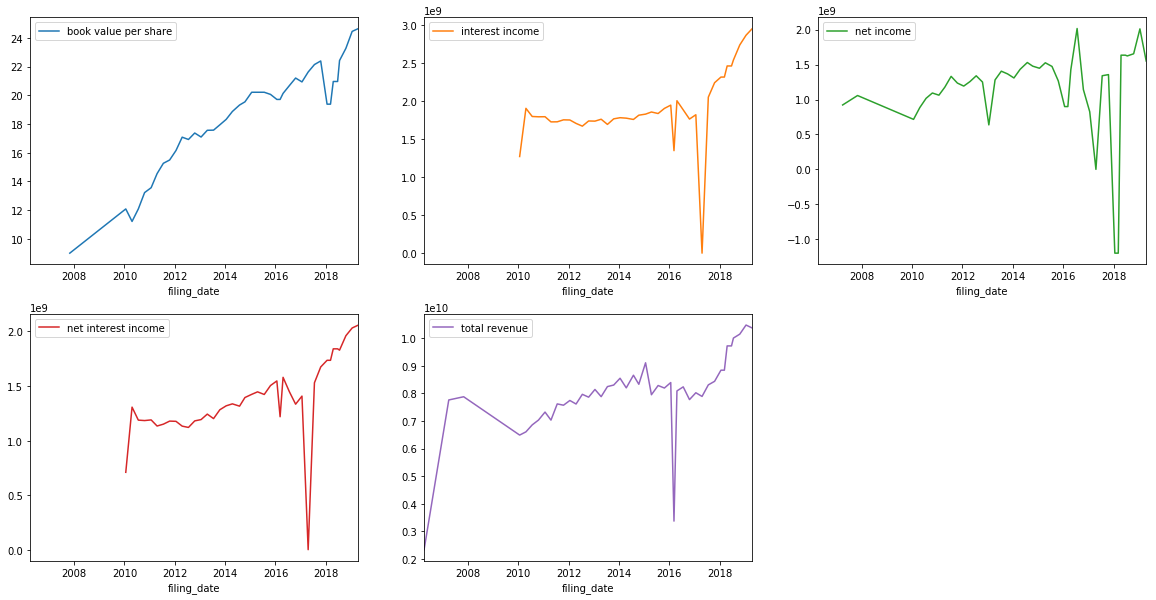

In [24]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [25]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000004962 book value per share        2005Q4 to 2007Q1: 6 periods    missing   
           book value per share        2007Q3 to 2009Q3: 9 periods    missing   
           book value per share        2015Q1 to 2015Q2: 2 periods    missing   
           interest income            2005Q4 to 2009Q3: 16 periods    missing   
           interest income                                  2015Q4  duplicate   
           net income                  2005Q4 to 2006Q3: 4 periods    missing   
           net income                                       2007Q1    missing   
           net income                  2007Q3 to 2009Q3: 9 periods    missing   
           net interest income        2005Q4 to 2009Q3: 16 periods    missing   
           provision for loan losses                          None      empty   
           total revenue               2006Q1 to 2006Q3: 3 periods    missing   
           total revenue                                    2007Q1    missing   
           total revenue               2007Q3 to 2009Q3: 9 periods    missing   
           total revenue                                    2015Q4  duplicate   

                                                 message  
cik        item                                           
0000004962 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income              Duplicate period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net interest income            Missing period  
           provision for loan losses  No values for item  
           total revenue                  Missing period  
           total revenue                  Missing period  
           total revenue                  Missing period  
           total revenue                Duplicate period

# Data

In [26]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)